In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch

### Chart Function

In [2]:
def plot_results(file_paths, labels):
    """
    Plots various metrics from machine learning training runs.

    Parameters:
    - file_paths: List of strings representing the file paths to CSV files.
    - labels: List of strings representing the labels for each dataset.
    """

    # Read DataFrames
    dataframes = [pd.read_csv(fp) for fp in file_paths]
    num_datasets = len(dataframes)

    # Extract data
    epochs_list = [df['Epoch'] for df in dataframes]
    test_accuracy_list = [df['Test Accuracy'] for df in dataframes]
    test_error_list = [df['Test Error'] for df in dataframes]
    training_loss_list = [df['Training Loss'] for df in dataframes]
    test_loss_list = [df['Test Loss'] for df in dataframes]

    # Square the gradient norms
    training_grad_norm_squared_list = [df['Training Gradient Norm']**2 for df in dataframes]
    test_grad_norm_squared_list = [df['Test Gradient Norm']**2 for df in dataframes]
    total_training_time_list = [df['Training Time (s)'].cumsum() for df in dataframes]

    # Check if Epochs are the same across datasets
    epochs = epochs_list[0]
    for idx, e in enumerate(epochs_list[1:], start=1):
        if not epochs.equals(e):
            print(f"Warning: Epochs in dataset {idx+1} differ from the first dataset.")

    # Set up colors using a colormap
    cmap_name = 'tab10' if num_datasets <= 10 else 'tab20'
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i % cmap.N) for i in range(num_datasets)]

    # Create subplots with 6 rows and 2 columns
    fig, axes = plt.subplots(6, 2, figsize=(20, 30))

    # Row 1: Test Accuracy over Epochs and Training Time
    # Plot 1: Test Accuracy over Epochs (left plot)
    for i in range(num_datasets):
        axes[0, 0].plot(epochs_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Test Accuracy')
    axes[0, 0].set_title(f'Test Accuracy over {len(epochs)} Epochs')
    axes[0, 0].legend()

    # Plot 2: Test Accuracy vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[0, 1].plot(total_training_time_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 1].set_xlabel('Training Time (s)')
    axes[0, 1].set_ylabel('Test Accuracy')
    axes[0, 1].set_title('Test Accuracy vs Total Training Time')
    axes[0, 1].legend()

    # Row 2: Training Loss over Epochs and Test Loss over Epochs
    # Plot 3: Training Loss over Epochs (left plot)
    for i in range(num_datasets):
        axes[1, 0].plot(epochs_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Training Loss')
    axes[1, 0].set_title(f'Training Loss over {len(epochs)} Epochs')
    axes[1, 0].legend()

    # Plot 4: Test Loss over Epochs (right plot)
    for i in range(num_datasets):
        axes[1, 1].plot(epochs_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Test Loss')
    axes[1, 1].set_title(f'Test Loss over {len(epochs)} Epochs')
    axes[1, 1].legend()

    # Row 3: Training Gradient Norm Squared over Epochs and Test Gradient Norm Squared over Epochs
    # Plot 5: Training Gradient Norm Squared over Epochs (left plot)
    for i in range(num_datasets):
        axes[2, 0].plot(epochs_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 0].set_xlabel('Epoch')
    axes[2, 0].set_ylabel('Gradient Norm Squared')
    axes[2, 0].set_title(f'Training Gradient Norm Squared over {len(epochs)} Epochs')
    axes[2, 0].legend()

    # Plot 6: Test Gradient Norm Squared over Epochs (right plot)
    for i in range(num_datasets):
        axes[2, 1].plot(epochs_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 1].set_xlabel('Epoch')
    axes[2, 1].set_ylabel('Gradient Norm Squared')
    axes[2, 1].set_title(f'Test Gradient Norm Squared over {len(epochs)} Epochs')
    axes[2, 1].legend()

    # Row 4: Training Loss vs Total Training Time and Test Loss vs Total Training Time
    # Plot 7: Training Loss vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[3, 0].plot(total_training_time_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 0].set_xlabel('Training Time (s)')
    axes[3, 0].set_ylabel('Training Loss')
    axes[3, 0].set_title('Training Loss vs Total Training Time')
    axes[3, 0].legend()

    # Plot 8: Test Loss vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[3, 1].plot(total_training_time_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 1].set_xlabel('Training Time (s)')
    axes[3, 1].set_ylabel('Test Loss')
    axes[3, 1].set_title('Test Loss vs Total Training Time')
    axes[3, 1].legend()

    # Row 5: Training Gradient Norm Squared vs Total Training Time and Test Gradient Norm Squared vs Total Training Time
    # Plot 9: Training Gradient Norm Squared vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[4, 0].plot(total_training_time_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 0].set_xlabel('Training Time (s)')
    axes[4, 0].set_ylabel('Gradient Norm Squared')
    axes[4, 0].set_title('Training Gradient Norm Squared vs Total Training Time')
    axes[4, 0].legend()

    # Plot 10: Test Gradient Norm Squared vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[4, 1].plot(total_training_time_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 1].set_xlabel('Training Time (s)')
    axes[4, 1].set_ylabel('Gradient Norm Squared')
    axes[4, 1].set_title('Test Gradient Norm Squared vs Total Training Time')
    axes[4, 1].legend()

    # Row 6: Test Error Rate over Epochs and Training Time
    # Plot 11: Test Error Rate vs Epoch (left plot)
    for i in range(num_datasets):
        axes[5, 0].plot(epochs_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 0].set_xlabel('Epoch')
    axes[5, 0].set_ylabel('Test Error')
    axes[5, 0].set_title(f'Test Error over {len(epochs)} Epochs')
    axes[5, 0].legend()

    # Plot 12: Test Error Rate vs Training Time (right plot)
    for i in range(num_datasets):
        axes[5, 1].plot(total_training_time_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 1].set_xlabel('Training Time (s)')
    axes[5, 1].set_ylabel('Test Error')
    axes[5, 1].set_title('Test Error vs Total Training Time')
    axes[5, 1].legend()

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

### n = 2000, m = 1000, Hinge Loss

##### GNOM

In [ ]:
# GNOM with lr 0.02, 0.01, 0.008, 0.005

lr_0_02_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.02/200/no_batching/no_wd/2024-10-25-14:50:38/results.csv"
lr_0_01_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/200/no_batching/no_wd/2024-10-25-14:50:50/results.csv"
lr_0_008_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.008/200/no_batching/no_wd/2024-10-25-14:51:08/results.csv"
lr_0_005_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.005/200/no_batching/no_wd/2024-10-25-14:51:34/results.csv"

files = [ lr_0_02_file_path, lr_0_01_file_path, lr_0_008_file_path, lr_0_005_file_path]
labels = ["GNOM, lr=0.02", "GNOM, lr=0.01", "GNOM, lr=0.008", "GNOM, lr=0.005"]

plot_results(files, labels)

In [ ]:
#GNOM with lr 0.1, 0.05, 0.02
lr_0_5_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.5/200/no_batching/no_wd/2024-10-25-14:57:45/results.csv"
lr_0_1_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/no_wd/2024-10-25-14:55:28/results.csv"
lr_0_05_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.05/200/no_batching/no_wd/2024-10-25-14:55:46/results.csv"
lr_0_02_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.02/200/no_batching/no_wd/2024-10-25-14:50:38/results.csv"

files = [lr_0_5_file_path, lr_0_1_file_path, lr_0_05_file_path, lr_0_02_file_path]
labels = [ "GNOM, lr=0.5","GNOM, lr=0.1", "GNOM, lr=0.05", "GNOM, lr=0.02"]

plot_results(files, labels)

In [ ]:
#GNOM with lr 0.45, 0.4, 0.3, 0.25

lr_0_4_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.4/200/no_batching/no_wd/2024-10-25-15:05:33/results.csv"
lr_0_3_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.3/200/no_batching/no_wd/2024-10-25-15:05:57/results.csv"
lr_0_25_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.25/200/no_batching/no_wd/2024-10-25-15:01:35/results.csv"

files = [ lr_0_4_file_path, lr_0_3_file_path, lr_0_25_file_path]
labels = [ "GNOM, lr=0.4", "GNOM, lr=0.3", "GNOM, lr=0.25"]

plot_results(files, labels)

In [ ]:
# GNOM with batch = 1, lr = 0.001, 0.0001, 0.00001

#file_path1 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.001/20/1/no_wd/2024-10-25-15:14:31/results.csv"
file_path2 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.0001/20/1/no_wd/2024-10-25-15:16:28/results.csv"
file_path3 = "generated/hinge/n_2000_m_1000/GNOM/lr-1e-05/20/1/no_wd/2024-10-25-15:17:35/results.csv"

files = [ file_path2, file_path3]
labels = [ "GNOM, batch=1, lr=0.0001", "GNOM, batch=1, lr=0.00001"]

plot_results(files, labels)

In [ ]:
# GNOM with lr = 0.1, and batch= {full, 256, 128, 64, 32}

file_path1 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/no_wd/2024-10-25-14:55:28/results.csv"
file_path2 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/256/no_wd/2024-10-25-15:24:31/results.csv"
file_path3 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/128/no_wd/2024-10-25-15:24:59/results.csv"
file_path4 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/32/no_wd/2024-10-25-15:25:31/results.csv"
files = [file_path1, file_path2, file_path3, file_path4]
labels = ["GNOM, full", "GNOM, batch=256", "GNOM, batch=128", "GNOM, batch=32"]

plot_results(files, labels)

In [ ]:
# GNOM with lr = 0.01, and batch= {256, 128, 64, 32}

file_path1 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/no_wd/2024-10-25-14:55:28/results.csv"
file_path2 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/256/no_wd/2024-10-25-15:24:31/results.csv"
file_path3 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/128/no_wd/2024-10-25-15:24:59/results.csv"
file_path4 = "generated/hinge/n_2000_m_1000/GNOM/lr-0.1/200/32/no_wd/2024-10-25-15:25:31/results.csv"

files = [file_path1, file_path2, file_path3, file_path4]
labels = ["GNOM, 256", "GNOM, batch=128", "GNOM, batch=64", "GNOM, batch=32"]

plot_results(files, labels)

##### SGD

In [ ]:
# SGD

lr_0_1_file_path = "generated/n_2000_m_1000/GD/lr-0.1/200/no_batching/2024-10-10-15:13:24/results.csv"
lr_0_01_file_path = "generated/n_2000_m_1000/GD/lr-0.01/200/no_batching/2024-10-10-15:13:36/results.csv"
lr_0_001_file_path = "generated/n_2000_m_1000/GD/lr-0.001/200/no_batching/2024-10-10-15:13:53/results.csv"
lr_0_0001_file_path = "generated/n_2000_m_1000/GD/lr-0.0001/200/no_batching/2024-10-10-15:14:06/results.csv"

files = [ lr_0_1_file_path, lr_0_01_file_path, lr_0_001_file_path, lr_0_0001_file_path]
labels = [ "GD, lr=0.1", "GD, lr=0.01", "GD, lr=0.001", "GD, lr=0.0001"]

plot_results(files, labels)

In [ ]:
# Learning rate 0.1
lr_0_1_full_batch_file_path = "generated/n_2000_m_1000/GD/lr-0.1/200/no_batching/2024-10-10-15:13:24/results.csv"
lr_0_1_batch_256_file_path = "generated/n_2000_m_1000/GD/lr-0.1/200/256/2024-10-10-15:28:01/results.csv"
lr_0_1_batch_128_file_path = "generated/n_2000_m_1000/GD/lr-0.1/200/128/2024-10-10-15:28:31/results.csv"
lr_0_1_batch_64_file_path = "generated/n_2000_m_1000/GD/lr-0.1/200/64/2024-10-10-15:28:42/results.csv"
lr_0_1_batch_32_file_path = "generated/n_2000_m_1000/GD/lr-0.1/200/32/2024-10-10-15:31:03/results.csv"

# Labels for lr=0.1
labels_lr_0_1 = [
    "GD, lr=0.1, full batch", "GD, lr=0.1, batch size=256", "GD, lr=0.1, batch size=128", 
    "GD, lr=0.1, batch size=64", "GD, lr=0.1, batch size=32"
]

# List of file paths for lr=0.1
file_paths_lr_0_1 = [
    lr_0_1_full_batch_file_path, lr_0_1_batch_256_file_path, lr_0_1_batch_128_file_path, 
    lr_0_1_batch_64_file_path, lr_0_1_batch_32_file_path
]

# Plot results for lr=0.1
plot_results(file_paths_lr_0_1, labels_lr_0_1)

In [ ]:
# Learning rate 0.01
lr_0_01_full_batch_file_path = "generated/n_2000_m_1000/GD/lr-0.01/200/no_batching/2024-10-10-15:13:36/results.csv"
lr_0_01_batch_256_file_path = "generated/n_2000_m_1000/GD/lr-0.01/200/256/2024-10-10-15:29:01/results.csv"
lr_0_01_batch_128_file_path = "generated/n_2000_m_1000/GD/lr-0.01/200/128/2024-10-10-15:29:12/results.csv"
lr_0_01_batch_64_file_path = "generated/n_2000_m_1000/GD/lr-0.01/200/64/2024-10-10-15:29:24/results.csv"
lr_0_01_batch_32_file_path = "generated/n_2000_m_1000/GD/lr-0.01/200/32/2024-10-10-15:29:41/results.csv"

# Labels for lr=0.01
labels_lr_0_01 = [
    "GD, lr=0.01, full batch", "GD, lr=0.01, batch size=256", "GD, lr=0.01, batch size=128", 
    "GD, lr=0.01, batch size=64", "GD, lr=0.01, batch size=32"
]

# List of file paths for lr=0.01
file_paths_lr_0_01 = [
    lr_0_01_full_batch_file_path, lr_0_01_batch_256_file_path, lr_0_01_batch_128_file_path, 
    lr_0_01_batch_64_file_path, lr_0_01_batch_32_file_path
]

# Plot results for lr=0.01
plot_results(file_paths_lr_0_01, labels_lr_0_01)


In [ ]:
# Learning rate 0.001
lr_0_001_full_batch_file_path = "generated/n_2000_m_1000/GD/lr-0.001/200/no_batching/2024-10-10-15:13:53/results.csv"
lr_0_001_batch_256_file_path = "generated/n_2000_m_1000/GD/lr-0.001/200/256/2024-10-10-15:30:03/results.csv"
lr_0_001_batch_128_file_path = "generated/n_2000_m_1000/GD/lr-0.001/200/128/2024-10-10-15:30:15/results.csv"
lr_0_001_batch_64_file_path = "generated/n_2000_m_1000/GD/lr-0.001/200/64/2024-10-10-15:30:27/results.csv"
lr_0_001_batch_32_file_path = "generated/n_2000_m_1000/GD/lr-0.001/200/32/2024-10-10-15:30:39/results.csv"

# Labels for lr=0.001
labels_lr_0_001 = [
    "GD, lr=0.001, full batch", "GD, lr=0.001, batch size=256", "GD, lr=0.001, batch size=128", 
    "GD, lr=0.001, batch size=64", "GD, lr=0.001, batch size=32"
]

# List of file paths for lr=0.001
file_paths_lr_0_001 = [
    lr_0_001_full_batch_file_path, lr_0_001_batch_256_file_path, lr_0_001_batch_128_file_path, 
    lr_0_001_batch_64_file_path, lr_0_001_batch_32_file_path
]

# Plot results for lr=0.001
plot_results(file_paths_lr_0_001, labels_lr_0_001)


In [ ]:
# batch size = 1, lr = 0.1, 0.01, 0.001, 0.0001
file_path1 = "generated/n_2000_m_1000/GD/lr-0.1/5/1/2024-10-10-16:22:18/results.csv"
file_path2 = "generated/n_2000_m_1000/GD/lr-0.01/5/1/2024-10-10-16:22:37/results.csv"
file_path3 = "generated/n_2000_m_1000/GD/lr-0.001/5/1/2024-10-10-16:22:50/results.csv"
file_path4 = "generated/n_2000_m_1000/GD/lr-0.0001/5/1/2024-10-10-16:23:03/results.csv"
file_path5 = "generated/n_2000_m_1000/GD/lr-1e-05/5/1/2024-10-10-16:23:18/results.csv"

files = [file_path1, file_path2, file_path3, file_path4, file_path5]
labels = ["GD, batch=1, lr=0.1", "GD, batch=1, lr=0.01", "GD, batch=1, lr=0.001", "GD, batch=1, lr=0.0001", "GD, batch=1, lr=0.00001"]

plot_results(files, labels)

In [ ]:
# batch size = 1, lr= 0.001, 0.0001, 0.00001
file_path1 = "generated/n_2000_m_1000/GD/lr-0.001/50/1/2024-10-10-16:29:54/results.csv"
file_path2 = "generated/n_2000_m_1000/GD/lr-0.0001/50/1/2024-10-10-16:29:05/results.csv"
file_path3 = "generated/n_2000_m_1000/GD/lr-1e-05/50/1/2024-10-10-16:27:07/results.csv"

files = [file_path1, file_path2, file_path3]
labels = ["GD, batch=1, lr=0.001", "GD, batch=1, lr=0.0001", "GD, batch=1, lr=0.00001"]

plot_results(files, labels)

In [ ]:
# BEST SGD RUNS
lr_0_1_full_batch_file_path = "generated/n_2000_m_1000/GD/lr-0.1/200/no_batching/2024-10-10-15:13:24/results.csv"
lr_0_01_full_batch_file_path = "generated/n_2000_m_1000/GD/lr-0.01/200/no_batching/2024-10-10-15:13:36/results.csv"
lr_0_001_batch_256_file_path = "generated/n_2000_m_1000/GD/lr-0.001/200/256/2024-10-10-15:30:03/results.csv"
file_path3 = "generated/n_2000_m_1000/GD/lr-1e-05/50/1/2024-10-10-16:27:07/results.csv"

# Labels for the plots
labels = [
    "GD, lr=0.1, full batch", 
    "GD, lr=0.01, full batch",
    "GD, lr=0.001, batch size=256",
    "GD, batch=1, lr=0.00001"
]

# List of file paths for the plots
file_paths = [
    lr_0_1_full_batch_file_path, 
    lr_0_01_full_batch_file_path, 
    lr_0_001_batch_256_file_path,
    file_path3
]

plot_results(file_paths, labels)

##### Comparison

In [ ]:
# COMPARING BEST RESULTS @200 EPOCHS
# GNOM w lr = 0.01, batch = full
# SGD w lr = 0.001, batch = 256
# AG w lr = 0.001, batch = full


lr_0_01_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/200/no_batching/2024-10-10-14:37:46/results.csv"
lr_0_001_batch_256_file_path = "generated/hinge/n_2000_m_1000/GD/lr-0.001/200/256/2024-10-10-15:30:03/results.csv"
lr_0_001_file_path = "generated/hinge/n_2000_m_1000/AG/lr-0.001/200/no_batching/no_wd/2024-10-17-12:27:50/results.csv"

files = [lr_0_01_file_path, lr_0_001_batch_256_file_path, lr_0_001_file_path]
labels = ["GNOM, lr=0.01, batch=full", "SGD, lr=0.001, batch=256", "AG, lr=0.001, batch=full"]

plot_results(files, labels)


In [ ]:
# COMPARING BEST RESULTS @500 EPOCHS


lr_0_01_file_path = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/500/no_batching/2024-10-10-15:44:56/results.csv"
lr_0_001_batch_256_file_path = "generated/hinge/n_2000_m_1000/GD/lr-0.001/500/256/2024-10-10-15:43:03/results.csv"
lr_0_001_file_path = "generated/hinge/n_2000_m_1000/AG/lr-0.001/500/no_batching/no_wd/2024-10-17-12:34:03/results.csv"
sgd_mom = "generated/hinge/n_2000_m_1000/GD/lr-0.001/500/256/no_wd/2024-10-17-12:42:19/results.csv"
gnom_mom = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/500/no_batching/no_wd/2024-10-17-12:46:09/results.csv"

files = [lr_0_01_file_path, gnom_mom, lr_0_001_batch_256_file_path, sgd_mom, lr_0_001_file_path]
labels = ["GNOM, lr=0.01, batch=full", "GNOM, w/ momentum", "SGD, lr=0.001, batch=256", "SGD, w/ momentum", "AG, lr=0.001, batch=full"]

plot_results(files, labels)

In [ ]:
# 2000 epoch run
sgd = "generated/hinge/n_2000_m_1000/GD/lr-0.001/2000/256/no_wd/2024-10-15-12:15:08/results.csv"
sgd_mom = "generated/hinge/n_2000_m_1000/GD/lr-0.001/2000/256/no_wd/2024-10-17-12:55:55/results.csv"
gnom = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/2000/no_batching/no_wd/2024-10-15-12:19:03/results.csv"
gnom_mom = "generated/hinge/n_2000_m_1000/GNOM/lr-0.01/2000/no_batching/no_wd/2024-10-17-12:52:01/results.csv"
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/2000/no_batching/no_wd/2024-10-17-12:59:28/results.csv"

files = [sgd, sgd_mom, gnom, gnom_mom, ag]
labels = ["SGD, lr=0.001", "SGD, w/ momentum", "GNOM, lr=0.01", "GNOM, w/ momentum", "AG, lr=0.001"]

plot_results(files, labels)

### n = 2000, m = 1000, Sigmoid Loss

In [ ]:
# GNOM
lr_22_file_path = "generated/sigmoid/n_2000_m_1000/GNOM/lr-22.0/200/no_batching/2024-10-11-10:20:50/results.csv"
lr_1_file_path = "generated/sigmoid/n_2000_m_1000/GNOM/lr-1.0/200/no_batching/2024-10-11-10:21:04/results.csv"
lr_0_1_file_path = "generated/sigmoid/n_2000_m_1000/GNOM/lr-0.1/200/no_batching/2024-10-11-10:21:19/results.csv"

files = [lr_22_file_path, lr_1_file_path, lr_0_1_file_path]
labels = ["GNOM, lr=22", "GNOM, lr=1", "GNOM, lr=0.1"]

plot_results(files, labels)

In [ ]:
# GNOM with hinge with lr 25, 22, 20, 15, 10

file_path1 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-25.0/200/no_batching/2024-10-11-10:43:52/results.csv"
file_path2 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-22.0/200/no_batching/2024-10-11-10:20:50/results.csv"
file_path3 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-20.0/200/no_batching/2024-10-11-10:44:35/results.csv"
file_path4 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-15.0/200/no_batching/2024-10-11-10:45:15/results.csv"
file_path5 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-10.0/200/no_batching/2024-10-11-10:45:28/results.csv"

files = [file_path1, file_path2, file_path3, file_path4, file_path5]
labels = ["GNOM, lr=25", "GNOM, lr=22", "GNOM, lr=20", "GNOM, lr = 15", "GNOM, lr=10"]

plot_results(files, labels)

In [ ]:
# GNOM with lr = 22, and batch= {full, 256, 128, 64, 32, 4}

file_path1 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-22.0/200/no_batching/2024-10-11-10:20:50/results.csv"
file_path2 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-22.0/200/256/2024-10-11-10:48:44/results.csv"
file_path3 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-22.0/200/128/2024-10-11-10:48:55/results.csv"
file_path4 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-22.0/200/64/2024-10-11-10:49:08/results.csv"
file_path5 = "generated/sigmoid/n_2000_m_1000/GNOM/lr-22.0/200/32/2024-10-11-10:49:23/results.csv"

files = [file_path1, file_path2, file_path3, file_path4, file_path5]
labels = ["GNOM, full", "GNOM, batch=256", "GNOM, batch=128", "GNOM, batch=64", "GNOM, batch=32"]

plot_results(files, labels)

In [ ]:
# comparison

gnom = "generated/sigmoid/n_2000_m_1000/GNOM/lr-22.0/200/no_batching/2024-10-11-10:20:50/results.csv"
ag = "generated/sigmoid/n_2000_m_1000/AG/lr-22.0/200/no_batching/no_wd/2024-10-18-10:13:17/results.csv"
sgd = "generated/sigmoid/n_2000_m_1000/GD/lr-22.0/200/no_batching/no_wd/2024-10-18-10:21:22/results.csv"

files = [gnom, ag, sgd]
labels = ["GNOM, lr=22", "AG", "SGD, lr=22"]

plot_results(files, labels)

### AG Investigation (NEW)

In [ ]:
# AG HINGE UPDATED

ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:16:33/results.csv"
ag2 = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:23:51/results.csv"

files = [ag, ag2]
labels = [ "AG, point lip", "AG, hessian lip"]

plot_results(files, labels)

In [ ]:
#AG SIGMOID (updated)
ag = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:31:40/results.csv"
ag2 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:29:29/results.csv"

files = [ag, ag2]
labels = [ "AG, point lip", "AG, hessian lip"]

plot_results(files, labels)

In [ ]:
# loss comparison 
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:16:33/results.csv"
ag2 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:31:40/results.csv"

files = [ag, ag2]
labels = ["AG, hinge", "AG, sigmoid"]

plot_results(files, labels)

In [ ]:
# loss comparison with regularization
ag = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-25-12:49:05/results.csv"
ag2 = "generated/sigmoid/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-25-12:49:21/results.csv"

files = [ag, ag2]
labels = ["AG, hinge, reg", "AG, sigmoid, reg"]

plot_results(files, labels)

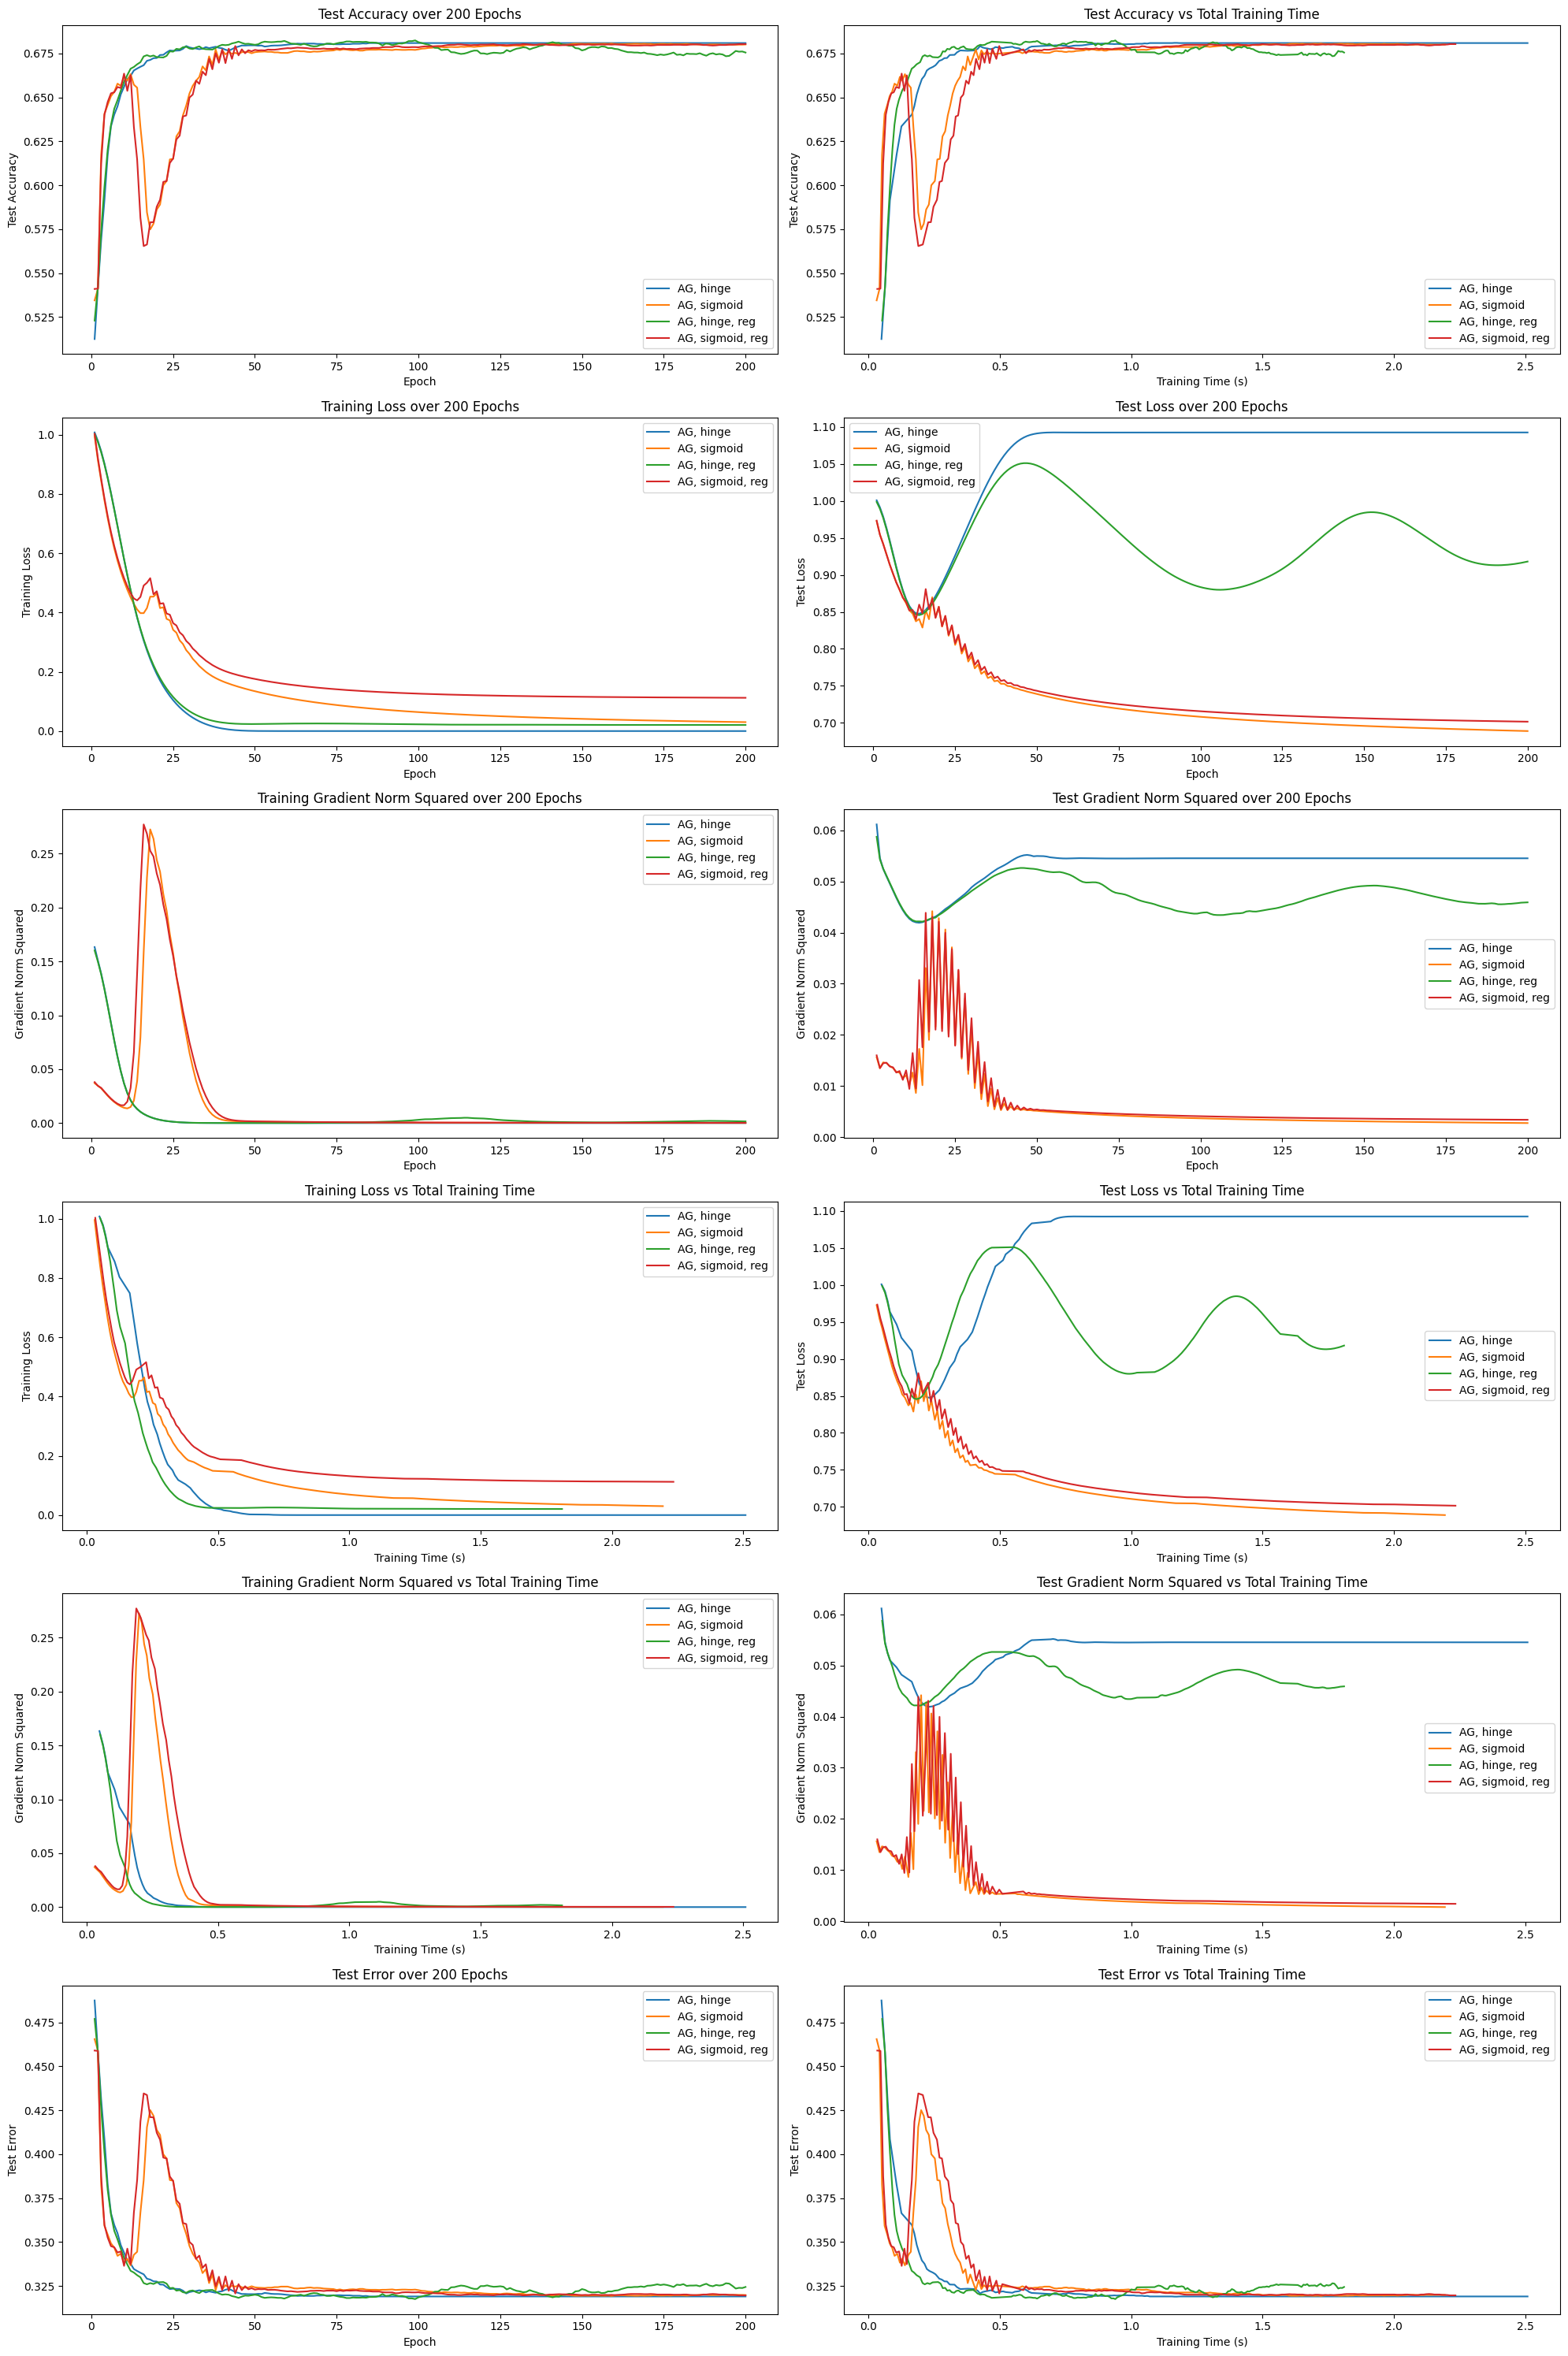

In [9]:
#reg vs non reg
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:16:33/results.csv"
ag2 = "generated/sigmoid/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-10-25-12:31:40/results.csv"
ag_reg = "generated/hinge/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-25-12:49:05/results.csv"
ag2_reg = "generated/sigmoid/n_2000_m_1000/AG_reg/lr-0.01/200/no_batching/no_wd/2024-10-25-12:49:21/results.csv"

files = [ag, ag2, ag_reg, ag2_reg]
labels = ["AG, hinge", "AG, sigmoid", "AG, hinge, reg", "AG, sigmoid, reg"]

plot_results(files, labels)